<a href="https://colab.research.google.com/github/sundeeptangirala/Wire-Transaction-Anomaly-Detection/blob/main/Wire_Anamaly_EndtoEnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


STEP 1: Generate historical (NORMAL) corporate wire data
HIST shape: (150225, 13)
HIST columns: ['transaction_id', 'corporate_id', 'account_id', 'timestamp', 'amount', 'currency', 'recipient_id', 'recipient_country', 'wire_type', 'channel', 'initiated_by', 'approved_by', 'corp_size']


,transaction_id,corporate_id,account_id,timestamp,amount,currency,recipient_id,recipient_country,wire_type,channel,initiated_by,approved_by,corp_size
0,T000000000001,CORP00001,CORP00001-ACCT001,2024-01-01 13:55:09,15815.27,USD,V0092738,US,domestic,treasury_portal,U12611,A00079,mid
1,T000000000002,CORP00001,CORP00001-ACCT001,2024-01-01 15:45:34,15430.72,USD,V0013106,IN,international,treasury_portal,U12611,A00079,mid
2,T000000000003,CORP00001,CORP00001-ACCT001,2024-01-01 15:46:36,13307.91,USD,V0008439,US,domestic,treasury_portal,U09508,A00079,mid
3,T000000000004,CORP00001,CORP00001-ACCT001,2024-01-02 09:02:11,17381.43,USD,V0041700,US,domestic,treasury_portal,U01589,A00079,mid
4,T000000000005,CORP00001,CORP00001-ACCT001,2024-01-02 11:10:01,53307.81,USD,V0050626,US,domestic,host_to_host,U01589,A00079,mid



STEP 2: Feature engineering on history
HIST FEAT shape: (150225, 27)
Engineered columns present? True


/tmp/ipython-input-285455248.py:182: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat = df.groupby(["corporate_id", "account_id"], group_keys=False).apply(add_features)


,timestamp,transaction_id,corporate_id,account_id,amount,currency,recipient_id,recipient_country,wire_type,channel,...,txn_count_1d,txn_count_7d,txn_count_30d,burst_30min,mins_since_last_txn,uniq_recip_30d,is_new_recipient,hour,outside_business_hours,is_international
0,2024-01-01 13:55:09,T000000000001,CORP00001,CORP00001-ACCT001,15815.27,USD,V0092738,US,domestic,treasury_portal,...,1.0,1.0,1.0,1.0,0.000000,1.0,1,13,0,0
1,2024-01-01 15:45:34,T000000000002,CORP00001,CORP00001-ACCT001,15430.72,USD,V0013106,IN,international,treasury_portal,...,2.0,2.0,2.0,1.0,110.416667,2.0,1,15,0,1
2,2024-01-01 15:46:36,T000000000003,CORP00001,CORP00001-ACCT001,13307.91,USD,V0008439,US,domestic,treasury_portal,...,3.0,3.0,3.0,2.0,1.033333,3.0,1,15,0,0
3,2024-01-02 09:02:11,T000000000004,CORP00001,CORP00001-ACCT001,17381.43,USD,V0041700,US,domestic,treasury_portal,...,4.0,4.0,4.0,1.0,1035.583333,4.0,1,9,0,0
4,2024-01-02 11:10:01,T000000000005,CORP00001,CORP00001-ACCT001,53307.81,USD,V0050626,US,domestic,host_to_host,...,5.0,5.0,5.0,1.0,127.833333,5.0,1,11,0,0



STEP 3: Train Isolation Forest on history features
Isolation Forest trained. n_features_in_ = 14

STEP 4: Generate unseen 2025 normal + anomalous (with labels)
UNSEEN normal shape: (9364, 14)
UNSEEN anomalous shape: (9502, 14)
Anomalous labels: {0: 9177, 1: 325}


,transaction_id,corporate_id,account_id,timestamp,amount,currency,recipient_id,recipient_country,wire_type,channel,initiated_by,approved_by,corp_size,is_true_anomaly
0,T010000000000,CORP00001,CORP00001-ACCT001,2025-01-01 17:58:43,41614.04,USD,V0001796,MX,international,treasury_portal,U09508,A01992,mid,0
1,T010000000001,CORP00001,CORP00001-ACCT001,2025-01-02 13:00:56,48063.23,USD,V0041700,US,domestic,host_to_host,U09508,A05027,mid,0
2,T010000000002,CORP00001,CORP00001-ACCT001,2025-01-02 18:53:57,8603.70,USD,V0029649,MX,international,host_to_host,U09508,A01992,mid,0
3,T010000000003,CORP00001,CORP00001-ACCT001,2025-01-03 15:08:58,23638.31,USD,V0013180,US,domestic,treasury_portal,U01589,A07152,mid,0
4,T010000000004,CORP00001,CORP00001-ACCT001,2025-01-07 17:51:02,24235.75,USD,V0002510,US,domestic,treasury_portal,U01589,A00079,mid,0


,transaction_id,corporate_id,account_id,timestamp,amount,currency,recipient_id,recipient_country,wire_type,channel,initiated_by,approved_by,corp_size,is_true_anomaly
52,T010000000052,CORP00001,CORP00001-ACCT001,2025-02-26 21:36:25,907641.85,USD,V0013106,US,domestic,host_to_host,U12611,A07152,mid,1
197,T010000000197,CORP00003,CORP00003-ACCT002,2025-01-05 08:06:36,1465967.86,USD,V0031679,US,domestic,branch,U04269,A04314,large,1
248,T010000000248,CORP00003,CORP00003-ACCT002,2025-02-21 10:53:18,291746.44,USD,V0081246,US,domestic,treasury_portal,U09775,A04314,large,1
249,T010000009478,CORP00003,CORP00003-ACCT002,2025-02-21 10:57:18,225535.75,USD,VNEW0184462,US,international,treasury_portal,U09775,A04314,large,1
250,T010000009480,CORP00003,CORP00003-ACCT002,2025-02-21 10:57:18,135694.47,USD,VNEW0043224,CN,international,treasury_portal,U09775,A04314,large,1
251,T010000009479,CORP00003,CORP00003-ACCT002,2025-02-21 10:59:18,194222.18,USD,VNEW0132209,US,international,treasury_portal,U09775,A04314,large,1
368,T010000000365,CORP00006,CORP00006-ACCT001,2025-02-04 08:46:44,416482.32,USD,VNEW0027823,US,domestic,host_to_host,U09759,A04005,large,1
437,T010000000434,CORP00006,CORP00006-ACCT002,2025-01-15 12:53:26,119441.59,USD,V0003736,MX,international,host_to_host,U10915,A04005,large,1
438,T010000009417,CORP00006,CORP00006-ACCT002,2025-01-15 13:01:26,109925.10,USD,VNEW0133190,MX,international,treasury_portal,U10915,A04005,large,1
439,T010000009416,CORP00006,CORP00006-ACCT002,2025-01-15 13:02:26,195516.68,USD,VNEW0057099,MX,international,treasury_portal,U10915,A04005,large,1



STEP 5: Feature engineering for unseen (append history first)


/tmp/ipython-input-285455248.py:182: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat = df.groupby(["corporate_id", "account_id"], group_keys=False).apply(add_features)
/tmp/ipython-input-285455248.py:182: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat = df.groupby(["corporate_id", "account_id"], group_keys=False).apply(add_features)


UNSEEN normal FEAT shape: (9364, 28)
UNSEEN anomalous FEAT shape: (9502, 28)

STEP 6: Score unseen data (no refit)
NORMAL dataset flags: {1: 9206, -1: 158}
ANOMALOUS dataset flags: {1: 9070, -1: 432}

STEP 7: Confusion matrix + report (synthetic test labels)
CONFUSION MATRIX [[TN FP],[FN TP]]:
[[9010  167]
 [  60  265]]
TN=9010 FP=167 FN=60 TP=265

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99      9177
     Anomaly       0.61      0.82      0.70       325

    accuracy                           0.98      9502
   macro avg       0.80      0.90      0.84      9502
weighted avg       0.98      0.98      0.98      9502


STEP 8: Explainability per alert (rule-based reason codes)
Alerts generated: 432


,transaction_id,corporate_id,account_id,timestamp,amount,amt_z_90d,txn_count_7d,burst_30min,uniq_recip_30d,is_new_recipient,outside_business_hours,is_international,iforest_score,explanation,is_true_anomaly
113,T010000008905,CORP00190,CORP00190-ACCT001,2025-02-02 22:28:00,695104.23,3.455325,1.0,1.0,1.0,0,1,1,-0.126990,AMT_SPIKE(z>3); OFF_HOURS; INTERNATIONAL,1.0
89,T010000003981,CORP00094,CORP00094-ACCT002,2025-01-06 22:52:00,678119.87,3.876331,1.0,1.0,4.0,0,1,1,-0.123498,AMT_SPIKE(z>3); OFF_HOURS; INTERNATIONAL,1.0
96,T010000003178,CORP00071,CORP00071-ACCT002,2025-02-01 01:45:00,491430.08,3.127416,1.0,1.0,2.0,0,1,1,-0.118835,AMT_SPIKE(z>3); OFF_HOURS; INTERNATIONAL,1.0
330,T010000007520,CORP00168,CORP00168-ACCT003,2025-03-20 23:35:48,817814.71,4.040304,1.0,1.0,4.0,0,1,0,-0.115934,AMT_SPIKE(z>3); OFF_HOURS,1.0
98,T010000000655,CORP00010,CORP00010-ACCT002,2025-01-31 22:19:00,586974.17,3.601283,1.0,1.0,2.0,0,1,1,-0.111664,AMT_SPIKE(z>3); OFF_HOURS; INTERNATIONAL,1.0
233,T010000006490,CORP00145,CORP00145-ACCT001,2025-03-29 00:30:11,812173.99,3.555528,1.0,1.0,7.0,1,1,0,-0.111199,AMT_SPIKE(z>3); NEW_RECIPIENT; OFF_HOURS,1.0
138,T010000005643,CORP00125,CORP00125-ACCT002,2025-03-09 16:32:46,1475856.90,4.247038,1.0,1.0,2.0,0,0,0,-0.110955,AMT_SPIKE(z>3),1.0
102,T010000003105,CORP00068,CORP00068-ACCT001,2025-03-03 20:02:28,1136374.09,2.474572,1.0,1.0,2.0,0,1,0,-0.110944,AMT_HIGH(z>2); OFF_HOURS,1.0
181,T010000008881,CORP00189,CORP00189-ACCT002,2025-03-06 08:55:40,1729954.04,5.093521,1.0,1.0,2.0,0,0,0,-0.110023,AMT_SPIKE(z>3),1.0
202,T010000001443,CORP00029,CORP00029-ACCT001,2025-02-02 10:26:43,1096659.27,4.897997,1.0,1.0,3.0,1,0,0,-0.108999,AMT_SPIKE(z>3); NEW_RECIPIENT,1.0



STEP 9: Visualization (unseen normal sample vs flagged alerts)


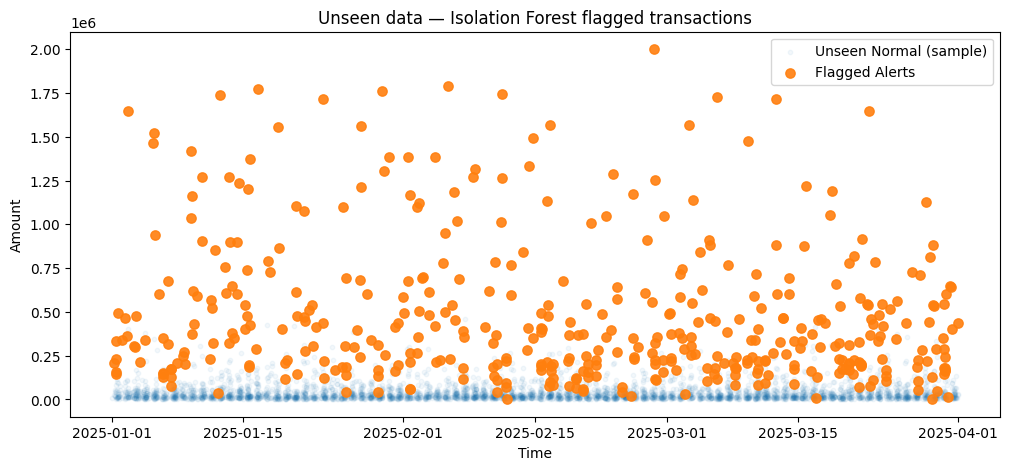


STEP 10: FINAL SELF-CHECK (pipeline completed)
✓ Data generated
✓ Features built
✓ Model trained
✓ New data generated + featured
✓ Scored + confusion matrix computed
✓ Explainability added + visualized

ALL STEPS COMPLETED SUCCESSFULLY.


In [1]:
# ============================================================
# END-to-END Corporate Wire Anomaly Detection (Colab-ready)
# - Generates historical NORMAL corporate wire data
# - Builds behavioral features (rolling windows, string-safe)
# - Trains Isolation Forest (unsupervised)
# - Generates UNSEEN normal + UNSEEN anomalous test data (with labels)
# - Computes features correctly (history + new)
# - Scores new data (flags + scores)
# - Confusion matrix + metrics (because synthetic test has labels)
# - Explainability per alert (rule-based)
# - Visualization
# - Runtime self-checks + prints
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 0) Utility print helper
# ----------------------------
def banner(msg):
    print("\n" + "="*80)
    print(msg)
    print("="*80)

# ----------------------------
# 1) Generate HISTORICAL (NORMAL) corporate wire data
# ----------------------------
def generate_corporate_wire_history(
    n_corps=200,
    start="2024-01-01",
    end="2024-12-31",
    seed=42
):
    rng = np.random.default_rng(seed)
    start_ts, end_ts = pd.Timestamp(start), pd.Timestamp(end)
    days = (end_ts - start_ts).days + 1

    corp_ids = [f"CORP{str(i).zfill(5)}" for i in range(1, n_corps + 1)]
    sizes = rng.choice(["small", "mid", "large"], size=n_corps, p=[0.55, 0.30, 0.15])

    size_params = {
        "small": dict(wpm=(10, 40),   mu=9.3,  sigma=0.65, vendors=(5, 25),  intl_rate=0.10),
        "mid":   dict(wpm=(30, 120),  mu=10.0, sigma=0.75, vendors=(15, 60), intl_rate=0.18),
        "large": dict(wpm=(80, 300),  mu=10.6, sigma=0.85, vendors=(40, 200),intl_rate=0.28),
    }

    global_vendors = [f"V{str(i).zfill(7)}" for i in range(1, 100_000)]
    global_initiators = [f"U{str(i).zfill(5)}" for i in range(1, 15_000)]
    global_approvers  = [f"A{str(i).zfill(5)}" for i in range(1, 12_000)]

    def sample_hour(n):
        hrs = np.arange(0, 24)
        w = np.ones(24)
        w[8:19] = 6
        w[0:6] = 0.5
        w[19:24] = 1.5
        w = w / w.sum()
        return rng.choice(hrs, size=n, p=w)

    txns = []
    txn_id = 1
    months = max(1, ((end_ts.year - start_ts.year) * 12 + (end_ts.month - start_ts.month + 1)))

    for corp, size in zip(corp_ids, sizes):
        p = size_params[size]

        avg_wpm = rng.uniform(*p["wpm"])
        n_wires = int(max(rng.poisson(avg_wpm * months), 20))

        n_vendors = rng.integers(p["vendors"][0], p["vendors"][1] + 1)
        vendor_pool = rng.choice(global_vendors, size=n_vendors, replace=False)

        initiator_pool = rng.choice(global_initiators, size=rng.integers(2, 15), replace=False)
        approver_pool  = rng.choice(global_approvers,  size=rng.integers(1, 8),  replace=False)

        rand_days = rng.integers(0, days, size=n_wires)
        base_dates = start_ts + pd.to_timedelta(rand_days, unit="D")
        hours = sample_hour(n_wires)
        minutes = rng.integers(0, 60, size=n_wires)
        seconds = rng.integers(0, 60, size=n_wires)
        timestamps = pd.to_datetime(
            base_dates + pd.to_timedelta(hours, "h") + pd.to_timedelta(minutes, "m") + pd.to_timedelta(seconds, "s")
        ).sort_values().to_numpy()

        amounts = rng.lognormal(mean=p["mu"], sigma=p["sigma"], size=n_wires)
        amounts = np.clip(amounts, 1_000, 2_000_000)

        # Some corporates have periodic large legit wires
        has_periodic_large = rng.random() < (0.10 if size in ["mid", "large"] else 0.04)
        if has_periodic_large:
            idx = rng.choice(np.arange(n_wires), size=min(6, n_wires), replace=False)
            amounts[idx] = rng.uniform(120_000, 800_000, size=len(idx))

        is_intl = rng.random(n_wires) < p["intl_rate"]
        wire_type = np.where(is_intl, "international", "domestic")

        intl_countries = ["CA", "UK", "IN", "MX", "DE", "SG", "AU"]
        countries = np.where(is_intl, rng.choice(intl_countries, size=n_wires), "US")

        channel = rng.choice(["treasury_portal", "host_to_host", "branch"], size=n_wires, p=[0.62, 0.33, 0.05])
        recipients = rng.choice(vendor_pool, size=n_wires, replace=True)
        initiated_by = rng.choice(initiator_pool, size=n_wires, replace=True)
        approved_by  = rng.choice(approver_pool,  size=n_wires, replace=True)

        account_ids = [f"{corp}-ACCT{str(i).zfill(3)}" for i in range(1, rng.integers(1, 5) + 1)]
        account_id = rng.choice(account_ids, size=n_wires, replace=True)

        for ts, amt, rid, ctry, wt, ch, ini, app, acct in zip(
            timestamps, amounts, recipients, countries, wire_type, channel, initiated_by, approved_by, account_id
        ):
            txns.append({
                "transaction_id": f"T{txn_id:012d}",
                "corporate_id": corp,
                "account_id": acct,
                "timestamp": pd.Timestamp(ts),
                "amount": round(float(amt), 2),
                "currency": "USD",
                "recipient_id": str(rid),
                "recipient_country": str(ctry),
                "wire_type": str(wt),
                "channel": str(ch),
                "initiated_by": str(ini),
                "approved_by": str(app),
                "corp_size": size
            })
            txn_id += 1

    return pd.DataFrame(txns).sort_values(["corporate_id", "account_id", "timestamp"]).reset_index(drop=True)

# ----------------------------
# 2) Feature Engineering (string-safe unique recipients)
# ----------------------------
def build_corporate_wire_features_fixed(hist_df: pd.DataFrame) -> pd.DataFrame:
    df = hist_df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values(["corporate_id", "account_id", "timestamp"]).reset_index(drop=True)

    def add_features(g: pd.DataFrame) -> pd.DataFrame:
        g = g.sort_values("timestamp").reset_index(drop=True)
        gt = g.set_index("timestamp").sort_index()

        # amount baselines
        gt["amt_avg_90d"] = gt["amount"].rolling("90D").mean()
        gt["amt_std_90d"] = gt["amount"].rolling("90D").std()
        gt["amt_z_90d"] = (gt["amount"] - gt["amt_avg_90d"]) / (gt["amt_std_90d"] + 1e-9)
        gt["amt_vs_avg_90d_pct"] = (gt["amount"] - gt["amt_avg_90d"]) / (gt["amt_avg_90d"] + 1e-9)

        # frequency / bursts
        gt["txn_count_1d"]  = gt["amount"].rolling("1D").count()
        gt["txn_count_7d"]  = gt["amount"].rolling("7D").count()
        gt["txn_count_30d"] = gt["amount"].rolling("30D").count()
        gt["burst_30min"]   = gt["amount"].rolling("30min").count()

        # recency
        gt["mins_since_last_txn"] = gt.index.to_series().diff().dt.total_seconds().div(60)

        out = gt.reset_index()

        # uniq recipients 30D (strings ok)
        ts = out["timestamp"].to_numpy()
        recip = out["recipient_id"].astype(str).to_numpy()
        uniq_30d = np.zeros(len(out), dtype=float)
        left = 0
        for right in range(len(out)):
            while ts[right] - ts[left] > np.timedelta64(30, "D"):
                left += 1
            uniq_30d[right] = len(set(recip[left:right+1]))
        out["uniq_recip_30d"] = uniq_30d

        # new recipient flag (ever seen before in this account stream)
        seen = set()
        is_new = []
        for rid in recip:
            is_new.append(0 if rid in seen else 1)
            seen.add(rid)
        out["is_new_recipient"] = is_new

        return out

    feat = df.groupby(["corporate_id", "account_id"], group_keys=False).apply(add_features)

    # fill NaNs
    fill_zero_cols = [
        "amt_avg_90d","amt_std_90d","amt_z_90d","amt_vs_avg_90d_pct",
        "txn_count_1d","txn_count_7d","txn_count_30d","burst_30min",
        "mins_since_last_txn","uniq_recip_30d"
    ]
    for c in fill_zero_cols:
        feat[c] = feat[c].fillna(0.0)
    feat["is_new_recipient"] = feat["is_new_recipient"].fillna(0).astype(int)

    # extra flags
    feat["hour"] = feat["timestamp"].dt.hour
    feat["outside_business_hours"] = ((feat["hour"] < 7) | (feat["hour"] > 19)).astype(int)
    feat["is_international"] = (feat["wire_type"] == "international").astype(int)

    return feat

# ----------------------------
# 3) Generate UNSEEN normal + anomalous data (with labels for testing)
# ----------------------------
def generate_unseen_2025_normal_and_anomalous(
    hist_df: pd.DataFrame,
    start="2025-01-01",
    end="2025-03-31",
    seed=123,
    normal_scale=0.25,
    anomaly_fraction=0.02
):
    rng = np.random.default_rng(seed)
    start_ts, end_ts = pd.Timestamp(start), pd.Timestamp(end)
    days = (end_ts - start_ts).days + 1

    hist_df = hist_df.copy()
    hist_df["timestamp"] = pd.to_datetime(hist_df["timestamp"])

    corp_size_map = hist_df.groupby("corporate_id")["corp_size"].agg(lambda x: x.iloc[0]).to_dict()

    # infer recent patterns from last 180 days
    cutoff = hist_df["timestamp"].max() - pd.Timedelta(days=180)
    h180 = hist_df[hist_df["timestamp"] >= cutoff].copy()

    pattern = {}
    for (corp, acct), g in h180.groupby(["corporate_id","account_id"]):
        g = g.sort_values("timestamp")
        q50 = max(g["amount"].quantile(0.5), 1.0)
        q90 = max(g["amount"].quantile(0.9), q50 + 1.0)
        sigma = float(np.clip(np.log(q90 / q50), 0.3, 1.2))
        pattern[(corp, acct)] = {
            "amount_mu": float(np.log(max(g["amount"].median(), 1.0))),
            "amount_sigma": sigma,
            "intl_rate": float((g["wire_type"] == "international").mean()),
            "channel_p": g["channel"].value_counts(normalize=True).to_dict(),
            "recipients": g["recipient_id"].astype(str).value_counts().index.to_list()[:200],
            "initiators": g["initiated_by"].astype(str).value_counts().index.to_list()[:50],
            "approvers":  g["approved_by"].astype(str).value_counts().index.to_list()[:30],
            "wires_per_day": max(len(g) / 180.0, 0.05),
        }

    def sample_hour(n):
        hrs = np.arange(0,24)
        w = np.ones(24)
        w[8:19] = 6
        w[0:6] = 0.5
        w[19:24] = 1.5
        w = w / w.sum()
        return rng.choice(hrs, size=n, p=w)

    txns = []
    txn_id_start = 10_000_000_000
    txn_id = txn_id_start

    # NORMAL unseen
    for (corp, acct), p in pattern.items():
        n_wires = rng.poisson(p["wires_per_day"] * days * normal_scale)
        if n_wires <= 0:
            continue

        rand_days = rng.integers(0, days, size=n_wires)
        base_dates = start_ts + pd.to_timedelta(rand_days, unit="D")
        hours = sample_hour(n_wires)
        minutes = rng.integers(0,60,size=n_wires)
        seconds = rng.integers(0,60,size=n_wires)
        ts = pd.to_datetime(base_dates + pd.to_timedelta(hours,"h") + pd.to_timedelta(minutes,"m") + pd.to_timedelta(seconds,"s")).sort_values().to_numpy()

        amounts = rng.lognormal(mean=p["amount_mu"], sigma=p["amount_sigma"], size=n_wires)
        amounts = np.clip(amounts, 1_000, 2_000_000)

        is_intl = rng.random(n_wires) < p["intl_rate"]
        wire_type = np.where(is_intl, "international", "domestic")
        intl_countries = ["CA","UK","IN","MX","DE","SG","AU"]
        countries = np.where(is_intl, rng.choice(intl_countries, size=n_wires), "US")

        channel_keys = list(p["channel_p"].keys()) if p["channel_p"] else ["treasury_portal","host_to_host","branch"]
        channel_probs = np.array([p["channel_p"].get(k, 0.0) for k in channel_keys])
        if channel_probs.sum() <= 0:
            channel_probs = np.ones(len(channel_keys))
        channel_probs = channel_probs / channel_probs.sum()
        channels = rng.choice(channel_keys, size=n_wires, p=channel_probs)

        recipients = rng.choice(p["recipients"], size=n_wires, replace=True)
        initiators = rng.choice(p["initiators"], size=n_wires, replace=True)
        approvers  = rng.choice(p["approvers"],  size=n_wires, replace=True)

        for t, amt, rid, ctry, wt, ch, ini, app in zip(ts, amounts, recipients, countries, wire_type, channels, initiators, approvers):
            txns.append({
                "transaction_id": f"T{txn_id:012d}",
                "corporate_id": corp,
                "account_id": acct,
                "timestamp": pd.Timestamp(t),
                "amount": float(np.round(amt,2)),
                "currency": "USD",
                "recipient_id": str(rid),
                "recipient_country": str(ctry),
                "wire_type": str(wt),
                "channel": str(ch),
                "initiated_by": str(ini),
                "approved_by": str(app),
                "corp_size": corp_size_map.get(corp, "mid"),
                "is_true_anomaly": 0
            })
            txn_id += 1

    normal_2025 = pd.DataFrame(txns).sort_values(["corporate_id","account_id","timestamp"]).reset_index(drop=True)

    # ANOMALOUS: perturb a fraction
    anom = normal_2025.copy()
    if len(anom) == 0:
        raise ValueError("No unseen data generated. Increase normal_scale.")

    n_anom = max(1, int(len(anom) * anomaly_fraction))
    idx = rng.choice(anom.index.to_numpy(), size=n_anom, replace=False)
    anom.loc[:, "is_true_anomaly"] = 0
    anom.loc[idx, "is_true_anomaly"] = 1

    global_new_vendors = [f"VNEW{str(i).zfill(7)}" for i in range(1, 200_000)]
    high_risk_countries = ["CN","HK","AE","RU","TR"]
    extra_burst_rows = []

    for i in idx:
        typ = rng.choice(["amount_spike","new_vendor_high_amt","off_hours_intl","burst"])
        corp = anom.at[i,"corporate_id"]
        acct = anom.at[i,"account_id"]
        base_ts = anom.at[i,"timestamp"]

        if typ == "amount_spike":
            anom.at[i,"amount"] = float(np.round(rng.uniform(400_000, 1_800_000),2))

        elif typ == "new_vendor_high_amt":
            anom.at[i,"recipient_id"] = rng.choice(global_new_vendors)
            anom.at[i,"amount"] = float(np.round(rng.uniform(150_000, 1_200_000),2))

        elif typ == "off_hours_intl":
            anom.at[i,"timestamp"] = pd.Timestamp(base_ts.date()) + pd.Timedelta(
                hours=int(rng.choice([1,2,3,4,22,23])),
                minutes=int(rng.integers(0,60))
            )
            anom.at[i,"wire_type"] = "international"
            anom.at[i,"recipient_country"] = rng.choice(high_risk_countries)
            anom.at[i,"amount"] = float(np.round(rng.uniform(120_000, 900_000),2))

        elif typ == "burst":
            anom.at[i,"amount"] = float(np.round(rng.uniform(80_000, 400_000),2))
            for _ in range(3):
                extra_burst_rows.append({
                    "transaction_id": f"T{txn_id:012d}",
                    "corporate_id": corp,
                    "account_id": acct,
                    "timestamp": base_ts + pd.Timedelta(minutes=int(rng.integers(1,15))),
                    "amount": float(np.round(rng.uniform(40_000, 250_000),2)),
                    "currency": "USD",
                    "recipient_id": rng.choice(global_new_vendors),
                    "recipient_country": rng.choice(["US","IN","MX","CN"]),
                    "wire_type": "international",
                    "channel": "treasury_portal",
                    "initiated_by": anom.at[i,"initiated_by"],
                    "approved_by": anom.at[i,"approved_by"],
                    "corp_size": corp_size_map.get(corp, "mid"),
                    "is_true_anomaly": 1
                })
                txn_id += 1

    anomalous_2025 = pd.concat([anom, pd.DataFrame(extra_burst_rows)], ignore_index=True) \
        .sort_values(["corporate_id","account_id","timestamp"]).reset_index(drop=True)

    return normal_2025, anomalous_2025

# ----------------------------
# 4) Explainability per alert (rule-based)
# ----------------------------
def explain_alert(row):
    reasons = []

    if row.get("amt_z_90d", 0) > 3:
        reasons.append("AMT_SPIKE(z>3)")
    elif row.get("amt_z_90d", 0) > 2:
        reasons.append("AMT_HIGH(z>2)")

    if row.get("burst_30min", 0) >= 3:
        reasons.append("BURST_30MIN")
    elif row.get("txn_count_1d", 0) >= 10:
        reasons.append("HIGH_DAILY_FREQ")

    if row.get("is_new_recipient", 0) == 1:
        reasons.append("NEW_RECIPIENT")

    if row.get("outside_business_hours", 0) == 1:
        reasons.append("OFF_HOURS")

    if row.get("is_international", 0) == 1:
        reasons.append("INTERNATIONAL")

    if not reasons:
        reasons.append("RARE_COMBO")

    return "; ".join(reasons)

# ----------------------------
# 5) MAIN RUN (with runtime checks)
# ----------------------------
banner("STEP 1: Generate historical (NORMAL) corporate wire data")
hist_df = generate_corporate_wire_history(n_corps=200, start="2024-01-01", end="2024-12-31", seed=42)
print("HIST shape:", hist_df.shape)
print("HIST columns:", list(hist_df.columns))
display(hist_df.head())

# Runtime check
assert hist_df.shape[0] > 0, "History data not generated"
assert hist_df["corporate_id"].nunique() > 10, "Too few corporates generated"
assert hist_df["amount"].min() > 0, "Amounts must be positive"

banner("STEP 2: Feature engineering on history")
feat_hist = build_corporate_wire_features_fixed(hist_df)
print("HIST FEAT shape:", feat_hist.shape)
print("Engineered columns present?",
      all(c in feat_hist.columns for c in ["amt_avg_90d","amt_z_90d","txn_count_7d","uniq_recip_30d","is_new_recipient"]))
display(feat_hist.head())

# Runtime checks
assert feat_hist.shape[0] == hist_df.shape[0], "Feature row count mismatch vs history"
for must in ["amt_avg_90d","amt_std_90d","amt_z_90d","txn_count_7d","uniq_recip_30d","is_new_recipient"]:
    assert must in feat_hist.columns, f"Missing engineered feature: {must}"

banner("STEP 3: Train Isolation Forest on history features")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

feature_cols = [
    "amount",
    "amt_avg_90d", "amt_std_90d", "amt_z_90d", "amt_vs_avg_90d_pct",
    "txn_count_1d", "txn_count_7d", "txn_count_30d", "burst_30min",
    "uniq_recip_30d", "is_new_recipient",
    "mins_since_last_txn",
    "outside_business_hours",
    "is_international"
]

# checks
missing_train = set(feature_cols) - set(feat_hist.columns)
assert not missing_train, f"Training features missing: {missing_train}"

X_train = feat_hist[feature_cols].copy()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

iso = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)
iso.fit(X_train_scaled)
print("Isolation Forest trained. n_features_in_ =", getattr(iso, "n_features_in_", None))

banner("STEP 4: Generate unseen 2025 normal + anomalous (with labels)")
normal_2025, anomalous_2025 = generate_unseen_2025_normal_and_anomalous(
    hist_df,
    start="2025-01-01",
    end="2025-03-31",
    seed=123,
    normal_scale=0.25,
    anomaly_fraction=0.02
)
print("UNSEEN normal shape:", normal_2025.shape)
print("UNSEEN anomalous shape:", anomalous_2025.shape)
print("Anomalous labels:", anomalous_2025["is_true_anomaly"].value_counts().to_dict())
display(normal_2025.head())
display(anomalous_2025[anomalous_2025["is_true_anomaly"]==1].head(10))

# checks
assert normal_2025.shape[0] > 100, "Too few unseen normal rows generated"
assert "is_true_anomaly" in anomalous_2025.columns, "Missing test label is_true_anomaly"
assert anomalous_2025["is_true_anomaly"].sum() > 0, "No anomalies labeled in anomalous set"

banner("STEP 5: Feature engineering for unseen (append history first)")
combo_norm = pd.concat([hist_df, normal_2025], ignore_index=True)
combo_anom = pd.concat([hist_df, anomalous_2025], ignore_index=True)

feat_combo_norm = build_corporate_wire_features_fixed(combo_norm)
feat_combo_anom = build_corporate_wire_features_fixed(combo_anom)

feat_normal_2025 = feat_combo_norm[feat_combo_norm["timestamp"] >= pd.Timestamp("2025-01-01")].copy()
feat_anom_2025   = feat_combo_anom[feat_combo_anom["timestamp"] >= pd.Timestamp("2025-01-01")].copy()

print("UNSEEN normal FEAT shape:", feat_normal_2025.shape)
print("UNSEEN anomalous FEAT shape:", feat_anom_2025.shape)

# checks
assert feat_normal_2025.shape[0] == normal_2025.shape[0], "Normal 2025 feature rows mismatch"
assert feat_anom_2025.shape[0] >= anomalous_2025.shape[0], "Anomalous 2025 features mismatch (should be >= due to burst extras)"
assert all(c in feat_normal_2025.columns for c in feature_cols), "Missing feature cols in feat_normal_2025"
assert all(c in feat_anom_2025.columns for c in feature_cols), "Missing feature cols in feat_anom_2025"

banner("STEP 6: Score unseen data (no refit)")
X_new_norm = feat_normal_2025[feature_cols].copy()
X_new_anom = feat_anom_2025[feature_cols].copy()

X_new_norm_scaled = scaler.transform(X_new_norm)
X_new_anom_scaled = scaler.transform(X_new_anom)

feat_normal_2025["iforest_score"] = iso.decision_function(X_new_norm_scaled)
feat_normal_2025["iforest_flag"]  = iso.predict(X_new_norm_scaled)

feat_anom_2025["iforest_score"] = iso.decision_function(X_new_anom_scaled)
feat_anom_2025["iforest_flag"]  = iso.predict(X_new_anom_scaled)

print("NORMAL dataset flags:", feat_normal_2025["iforest_flag"].value_counts().to_dict())
print("ANOMALOUS dataset flags:", feat_anom_2025["iforest_flag"].value_counts().to_dict())

# checks
assert "iforest_flag" in feat_normal_2025.columns and "iforest_flag" in feat_anom_2025.columns, "Scoring failed"
assert feat_normal_2025["iforest_flag"].isin([-1,1]).all(), "Unexpected flag values"

banner("STEP 7: Confusion matrix + report (synthetic test labels)")
from sklearn.metrics import confusion_matrix, classification_report

y_true = feat_anom_2025["is_true_anomaly"].astype(int)
y_pred = (feat_anom_2025["iforest_flag"] == -1).astype(int)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print("CONFUSION MATRIX [[TN FP],[FN TP]]:")
print(cm)
print(f"TN={tn} FP={fp} FN={fn} TP={tp}\n")
print(classification_report(y_true, y_pred, target_names=["Normal","Anomaly"]))

banner("STEP 8: Explainability per alert (rule-based reason codes)")
alerts = feat_anom_2025[feat_anom_2025["iforest_flag"] == -1].copy()
alerts["explanation"] = alerts.apply(explain_alert, axis=1)

review_cols = [
    "transaction_id","corporate_id","account_id","timestamp","amount",
    "amt_z_90d","txn_count_7d","burst_30min",
    "uniq_recip_30d","is_new_recipient",
    "outside_business_hours","is_international",
    "iforest_score","explanation","is_true_anomaly"
]

print("Alerts generated:", alerts.shape[0])
display(alerts.sort_values("iforest_score").head(30)[review_cols])

banner("STEP 9: Visualization (unseen normal sample vs flagged alerts)")
plt.figure(figsize=(12,5))
sample_norm = feat_normal_2025.sample(min(4000, len(feat_normal_2025)), random_state=1)
plt.scatter(sample_norm["timestamp"], sample_norm["amount"], alpha=0.05, s=10, label="Unseen Normal (sample)")
plt.scatter(alerts["timestamp"], alerts["amount"], alpha=0.9, s=45, label="Flagged Alerts")
plt.title("Unseen data — Isolation Forest flagged transactions")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.show()

banner("STEP 10: FINAL SELF-CHECK (pipeline completed)")
assert hist_df.shape[0] > 0
assert feat_hist.shape[0] == hist_df.shape[0]
assert feat_normal_2025.shape[0] == normal_2025.shape[0]
assert alerts.shape[0] >= 0
print("✓ Data generated")
print("✓ Features built")
print("✓ Model trained")
print("✓ New data generated + featured")
print("✓ Scored + confusion matrix computed")
print("✓ Explainability added + visualized")
print("\nALL STEPS COMPLETED SUCCESSFULLY.")
